## BaarleNet [Part 4a - more folding].ipynb

In [1]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import cv2
from matplotlib.gridspec import GridSpec
from tqdm import tqdm
import os

In [2]:
map=cv2.imread('Baarle-Nassau_-_Baarle-Hertog-en.svg.png')[:,:,(2,1,0)]

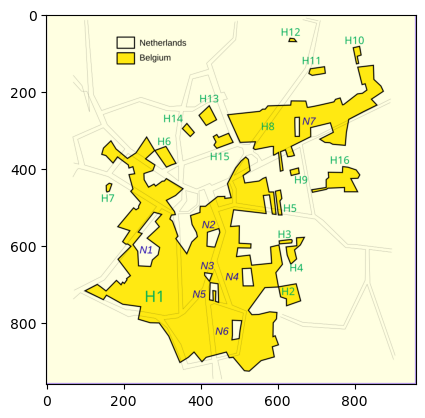

In [3]:
plt.imshow(map)

In [105]:
X=np.array([[0, 0],
            [0, 1],
            [1, 0],
            [1, 1], 
            [0.5, 0],
            [0.7, 0]])
y=np.array([1, 0, 0, 1, 0, 1]) 

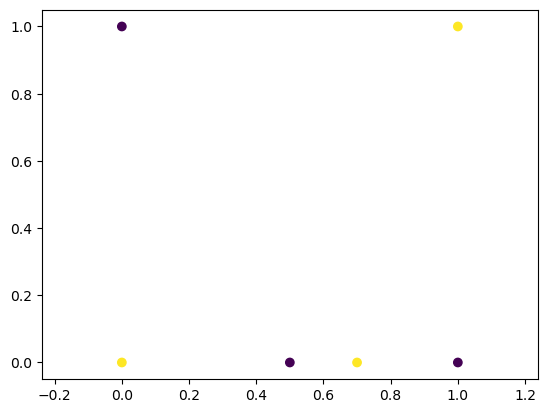

In [106]:
plt.scatter(X[:,0], X[:,1], c=y); plt.axis('equal');

In [107]:
class BaarleNet(nn.Module):
    def __init__(self, hidden_layers=[64]):
        super(BaarleNet, self).__init__()
        layers = [nn.Linear(2, hidden_layers[0]), nn.ReLU()]
        for i in range(len(hidden_layers)-1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_layers[-1], 2))
        self.layers=layers
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

In [532]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.tensor(y)

model = BaarleNet([2,2,2])
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.25)
optimizer = optim.Adam(model.parameters(), lr=0.01) #0.005

num_epochs = 1000
for epoch in range(num_epochs):
    # Batch
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    #Stochastic
    # outputs = model(torch.tensor(X[epoch%len(y)]).float())
    # loss = criterion(outputs, torch.tensor(y[epoch%len(y)])) 
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    if (epoch+1) % (num_epochs//10) == 0:
        outputs_batch = model(X_tensor)
        accuracy=(torch.argmax(outputs_batch, dim=1)==y_tensor).sum().item()/len(y)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


Epoch [100/1000], Loss: 0.6396, Accuracy: 0.5000
Epoch [200/1000], Loss: 0.6387, Accuracy: 0.5000
Epoch [300/1000], Loss: 0.6385, Accuracy: 0.5000
Epoch [400/1000], Loss: 0.6386, Accuracy: 0.5000
Epoch [500/1000], Loss: 0.6386, Accuracy: 0.5000
Epoch [600/1000], Loss: 0.6386, Accuracy: 0.5000
Epoch [700/1000], Loss: 0.6386, Accuracy: 0.5000
Epoch [800/1000], Loss: 0.6386, Accuracy: 0.5000
Epoch [900/1000], Loss: 0.6386, Accuracy: 0.5000
Epoch [1000/1000], Loss: 0.6387, Accuracy: 0.5000


In [110]:
model.model[0].weight

Parameter containing:
tensor([[ 0.5694,  0.0286],
        [ 0.5865, -0.7058]], requires_grad=True)

In [98]:
model.model[0].bias

Parameter containing:
tensor([ 1.9684e+00, -1.7688e-05], requires_grad=True)

In [99]:
model.model[2].weight

Parameter containing:
tensor([[-2.5799,  3.8945],
        [ 2.4374, -3.6731]], requires_grad=True)

In [100]:
model.model[2].bias

Parameter containing:
tensor([ 1.5468, -2.6652], requires_grad=True)

In [96]:
model.model[4].weight

In [82]:
model.model[4].bias

Parameter containing:
tensor([ 1.0941, -0.3281], requires_grad=True)

In [542]:
for meta_count in range(100):

    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.tensor(y)
    
    model = BaarleNet([2,2])
    criterion = nn.CrossEntropyLoss()
    # optimizer = optim.SGD(model.parameters(), lr=0.25)
    optimizer = optim.Adam(model.parameters(), lr=0.01) #0.005
    
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Batch
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
    
        #Stochastic
        # outputs = model(torch.tensor(X[epoch%len(y)]).float())
        # loss = criterion(outputs, torch.tensor(y[epoch%len(y)])) 
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
        if (epoch+1) % (num_epochs//10) == 0:
            outputs_batch = model(X_tensor)
            accuracy=(torch.argmax(outputs_batch, dim=1)==y_tensor).sum().item()/len(y)
            if accuracy==1.0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
                assert False


Epoch [500/1000], Loss: 0.2477, Accuracy: 1.0000


AssertionError: 

In [547]:
logits=model(X_tensor).detach().numpy()

In [554]:
logits.argmax(1)

array([1, 0, 0, 1, 0, 1])

In [555]:
y_tensor

tensor([1, 0, 0, 1, 0, 1])

In [565]:
# torch.nn.Softmax(dim=1)(model(X_tensor).detach())

In [566]:
print(model.model[0].weight)
print(model.model[0].bias)
print(model.model[2].weight)
print(model.model[2].bias)
print(model.model[4].weight)
print(model.model[4].bias)

Parameter containing:
tensor([[1.8329, 0.2956],
        [0.0431, 2.5218]], requires_grad=True)
Parameter containing:
tensor([-0.9266,  0.8826], requires_grad=True)
Parameter containing:
tensor([[ 2.7394, -0.3022],
        [ 3.4301, -1.3747]], requires_grad=True)
Parameter containing:
tensor([ 1.0193, -0.0041], requires_grad=True)
Parameter containing:
tensor([[-2.2733,  3.5625],
        [ 1.3076, -3.6241]], requires_grad=True)
Parameter containing:
tensor([ 1.6940, -0.9918], requires_grad=True)


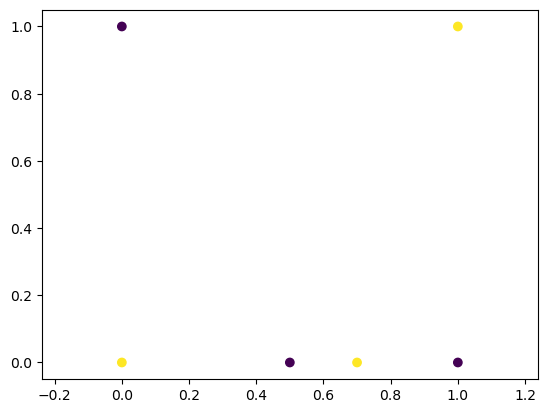

In [564]:
plt.scatter(X[:,0], X[:,1], c=y); plt.axis('equal');

In [560]:
h1b=model.model[:2](X_tensor).detach().numpy()

In [567]:
h1b

array([[0.        , 0.8825574 ],
       [0.        , 3.404363  ],
       [0.90632004, 0.92565954],
       [1.2019575 , 3.4474652 ],
       [0.        , 0.90410846],
       [0.35645562, 0.9127289 ]], dtype=float32)

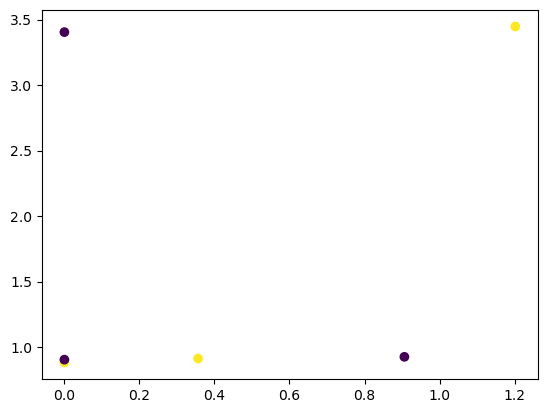

In [561]:
plt.scatter(h1b[:,0], h1b[:,1], c=y)

In [562]:
h2b=model.model[:4](X_tensor).detach().numpy()

In [568]:
h2b

array([[0.7525196 , 0.        ],
       [0.        , 0.        ],
       [3.2222695 , 1.832149  ],
       [3.2699804 , 0.        ],
       [0.74600625, 0.        ],
       [1.7198769 , 0.        ]], dtype=float32)

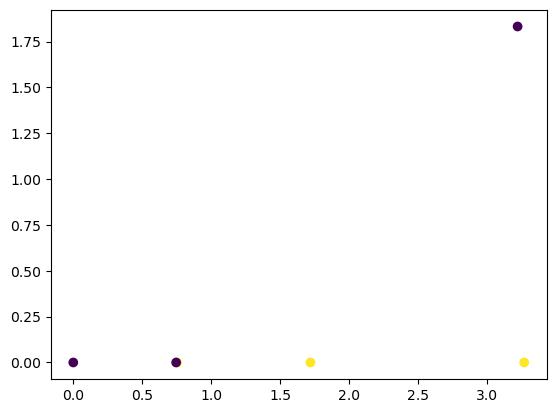

In [563]:
plt.scatter(h2b[:,0], h2b[:,1], c=y)

In [556]:
model

BaarleNet(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=2, bias=True)
  )
)

In [535]:
for meta_count in range(100):

    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.tensor(y)
    
    model = BaarleNet([2,2])
    criterion = nn.CrossEntropyLoss()
    # optimizer = optim.SGD(model.parameters(), lr=0.25)
    optimizer = optim.Adam(model.parameters(), lr=0.01) #0.005
    
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Batch
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
    
        #Stochastic
        # outputs = model(torch.tensor(X[epoch%len(y)]).float())
        # loss = criterion(outputs, torch.tensor(y[epoch%len(y)])) 
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
        if (epoch+1) % (num_epochs//10) == 0:
            outputs_batch = model(X_tensor)
            accuracy=(torch.argmax(outputs_batch, dim=1)==y_tensor).sum().item()/len(y)
            if accuracy==1.0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
                assert False


Epoch [300/1000], Loss: 0.1229, Accuracy: 1.0000


AssertionError: 

Oh shit - man that took a lot of trials lol.  Glad I automated

In [539]:
print(model.model[0].weight)
print(model.model[0].bias)
print(model.model[2].weight)
print(model.model[2].bias)
print(model.model[4].weight)
print(model.model[4].bias)

Parameter containing:
tensor([[ 1.0029, -0.6230],
        [ 2.8121,  0.8278]], requires_grad=True)
Parameter containing:
tensor([-0.7090, -0.0124], requires_grad=True)
Parameter containing:
tensor([[ 3.3029, -0.5193],
        [-0.8951, -1.7582]], requires_grad=True)
Parameter containing:
tensor([1.3325, 1.4397], requires_grad=True)
Parameter containing:
tensor([[ 3.8890, -3.2438],
        [-3.7306,  3.4852]], requires_grad=True)
Parameter containing:
tensor([-2.0648,  1.4074], requires_grad=True)


In [540]:
for meta_count in tqdm(range(100)):

    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.tensor(y)
    
    model = BaarleNet([3])
    criterion = nn.CrossEntropyLoss()
    # optimizer = optim.SGD(model.parameters(), lr=0.25)
    optimizer = optim.Adam(model.parameters(), lr=0.01) #0.005
    
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Batch
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
    
        #Stochastic
        # outputs = model(torch.tensor(X[epoch%len(y)]).float())
        # loss = criterion(outputs, torch.tensor(y[epoch%len(y)])) 
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
        if (epoch+1) % (num_epochs//10) == 0:
            outputs_batch = model(X_tensor)
            accuracy=(torch.argmax(outputs_batch, dim=1)==y_tensor).sum().item()/len(y)
            if accuracy==1.0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
                assert False


Epoch [400/1000], Loss: 0.2181, Accuracy: 1.0000


AssertionError: 

In [541]:
print(model.model[0].weight)
print(model.model[0].bias)
print(model.model[2].weight)
print(model.model[2].bias)

Parameter containing:
tensor([[ 1.6487, -1.6448],
        [-2.5690, -1.2751],
        [-2.1212,  0.6223]], requires_grad=True)
Parameter containing:
tensor([-0.0144,  1.2796,  1.4843], requires_grad=True)
Parameter containing:
tensor([[ 1.6423, -2.6725,  1.9869],
        [-1.0834,  2.7663, -2.5658]], requires_grad=True)
Parameter containing:
tensor([-1.5996,  1.5652], requires_grad=True)
